In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [35]:
df = pd.read_csv("SVMtrain.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [36]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [37]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [38]:
df = pd.get_dummies(df,columns=['Sex'],drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female
0,1,0,3,22.0,1,0,7.2500,3,False
1,2,1,1,38.0,1,0,71.2833,1,True
2,3,1,3,26.0,0,0,7.9250,3,True
3,4,1,1,35.0,1,0,53.1000,3,True
4,5,0,3,35.0,0,0,8.0500,3,False


In [39]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female
0,1,0,3,22.0,1,0,7.2500,3,False
1,2,1,1,38.0,1,0,71.2833,1,True
2,3,1,3,26.0,0,0,7.9250,3,True
3,4,1,1,35.0,1,0,53.1000,3,True
4,5,0,3,35.0,0,0,8.0500,3,False
...,...,...,...,...,...,...,...,...,...
884,887,0,2,27.0,0,0,13.0000,3,False
885,888,1,1,19.0,0,0,30.0000,3,True
886,889,0,3,60.0,1,2,23.4500,3,True
887,890,1,1,26.0,0,0,30.0000,1,False


In [40]:
X = df.drop(columns=['Sex_female'])
y = df['Sex_female']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.33, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [44]:
X_train.shape

(398, 8)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5950 - loss: 0.6505 - val_accuracy: 0.7208 - val_loss: 0.5998
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7168 - loss: 0.5759 - val_accuracy: 0.7360 - val_loss: 0.5612
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7731 - loss: 0.5361 - val_accuracy: 0.7462 - val_loss: 0.5384
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7543 - loss: 0.5119 - val_accuracy: 0.7614 - val_loss: 0.5200
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7221 - loss: 0.5430 - val_accuracy: 0.7716 - val_loss: 0.5072
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7683 - loss: 0.4961 - val_accuracy: 0.7766 - val_loss: 0.4983
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7804 - loss: 0.4914 - val_accuracy: 0.7716 - val_loss: 0.4919
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7593 - loss: 0.5239 - val_accuracy: 0.7766 - val_lo

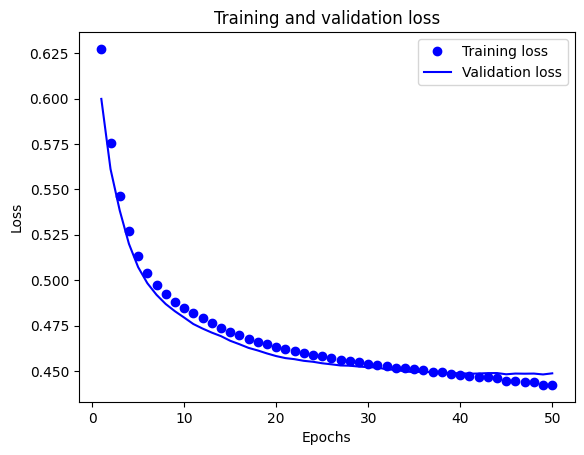

In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers

# 2. 모델구성
model = Sequential()
model.add(Dense(8, input_dim=8)) #feature.=column (x1,x2)
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
        
# 3. 컴파일, 훈련
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=20,
                    validation_data=(X_valid, y_valid))
# 4. 예측, 평가
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [61]:
predict = model.predict(X_test)
predict

predcit_binary = (predict > 0.5).astype(int= (predict > 0.5).astype(int))
predcit_binary                                      

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


TypeError: astype() got an unexpected keyword argument 'int'

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predcit_binary )


array([[158,  26],
       [ 30,  80]], dtype=int64)